In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

# we'll need some path manipulations later on
import os

import scipy.io.wavfile

import collections

Populating the interactive namespace from numpy and matplotlib


In [2]:
def Audio(fname):
    """Provide a player widget for an audio file.
    
    Parameters
    ==========
    fname : string
      Filename to be played.
      
    Warning
    =======
    
    Browsers cache audio very aggressively. If you change an
    audio file on disk and are trying to listen to the  new version, you 
    may want to 
    """
    from IPython.display import HTML, display
    
    # Find out file extension and deduce MIME type for audio format
    ext = os.path.splitext(fname)[1].replace('.', '').lower()
    mimetype = 'audio/' + ('mpeg' if ext == 'mp3' else ext)
    
    tpl = """<p>{fname}:</p>
<audio controls>
    <source src="files/{fname}" type="{mimetype}">

Your browser does not support the Audio element; you can play 
<a href="files/{fname}">this file</a> manually.
</audio>
"""
    display(HTML(tpl.format(**locals())))

In [3]:
def specgram_cbar(x, title=None, clim=(0, 80) ):
    """Plot spectrogram with a colorbar and range normalization.
    
    Call matplotlib's specgram function, with a custom figure size, 
    automatic colobar, title and custom color limits to ease 
    comparison across multiple figures.
    
    Parameters
    ==========
    x : array
      One-dimensional array whose spectrogram should be plotted.
      
    title : string
      Optional title for the figure.
      
    clim : 2-tuple
      Range for the color limits plotted in the spectrogram.
    """
    f = plt.figure(figsize=(10,3))
    plt.specgram(x, Fs = 2)
    plt.colorbar()
    plt.clim(*clim)
    if title is not None:
        plt.title(title)
    plt.show()

In [4]:
#using Audio function defined above to listen to voice.wav
#path should be the path to the .wav file starting from your pwd
audio_path = 'python-seminar/Homeworks/hw_1/data/voice.wav'
Audio(audio_path)

In [5]:
def compress_signal(x, fraction):
    """Compress an input signal by dropping a fraction of its spectrum.
    
    Parameters
    ==========
    x : array
      1-d real array to be compressed
      
    fraction : float
      A number in the [0,1] range indicating which fraction of the spectrum
      of x should be zeroed out (1 means zero out the entire signal).
      
    Returns
    =======
    x_approx : array
      1-d real array reconstructed after having compressed the input.
    """
    
    list_norm = []
    for index in range(len(x)):
        norm = float(x[index]) - np.mean(x) #offset by mean
        list_norm.append(norm)
    norm_sig = np.asarray(list_norm)
        
    spectrum = np.fft.rfft(norm_sig) #encode - get signal spectrum
    clip = np.abs(spectrum) <= fraction * np.amax(np.abs(spectrum)) #threshold on spectrum
    spectrum[clip] = 0 #apply threshold
    return np.fft.irfft(spectrum) + np.mean(x) #decode - return compressed signal (plus offset)

In [6]:
x = np.random.rand(128)

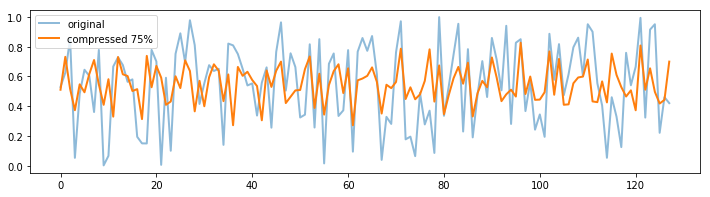

In [7]:
#here we try a fraction value of 0.75
fraction = 0.75  # play changing this in the 0-1 range

xa = compress_signal(x, fraction)

plt.figure(figsize=(12,3))
plt.plot(x, alpha=0.5, lw=2, label='original')
plt.plot(xa, lw=2, label='compressed {0:.0%}'.format(fraction))
plt.legend();

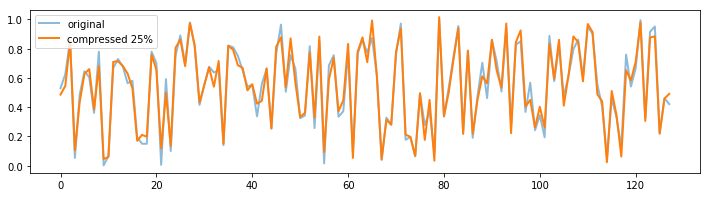

In [8]:
#here we try a fraction value of 0.25
fraction = 0.25  # play changing this in the 0-1 range

xa = compress_signal(x, fraction)

plt.figure(figsize=(12,3))
plt.plot(x, alpha=0.5, lw=2, label='original')
plt.plot(xa, lw=2, label='compressed {0:.0%}'.format(fraction))
plt.legend();

In [9]:
def compress_wav(fname, fraction):
    """Compress an audio signal stored in an input wav file.
    
    The compressed signal is returned as a numpy array and automatically written 
    to disk to a new wav file.
    
    Parameters
    ==========
    fname : string
      Name of the input wav file
      
    fraction : float
      Fraction of input data to keep.
      
    Returns
    =======
    rate : int
      Bit rate of the input signal.

    x : array
      Raw data of the original input signal.
      
    x_approx : array
      Raw data of the compressed signal.
      
    new_fname : string
      Auto-generated filename of the compressed signal.
    """
    
    #fname should be path, starting from your pwd, to .wav file
    #e.g. 'python-seminar/Homeworks/hw_1/data/voice.wav'
    x = scipy.io.wavfile.read(fname)
    
    list_norm = []
    for index in range(len(x[1])):
        norm = float(x[1][index]) - np.mean(x[1]) #offset by mean
        list_norm.append(norm)
    norm_sig = np.asarray(list_norm)
    
    spectrum = np.fft.rfft(norm_sig) #encode - get signal spectrum
    clip = np.abs(spectrum.real) <= fraction * np.amax(np.abs(spectrum.real)) #threshold on spectrum
    spectrum[clip] = 0 #apply threshold 
    x_approx = np.fft.irfft(spectrum) + np.mean(x[1]) #dencode - compressed signal (plus offset)
    x_approx = x_approx.astype(int16) #cast to right dtype
    
    str_frac = str(fraction)
    new_fname = fname[:-4]+'_comp_'+str_frac+'.wav' #create compressed fname
    
    #a compressed version of the signal is written to the same
    #directory the original signal is contained in
    scipy.io.wavfile.write(new_fname,x[0],x_approx) #write compressed file

    return x[0], x[1], x_approx, new_fname

In [10]:
#generating compressed version of voice.wav
#using compression ratios: 0.1, 0.5, 0.75, 0.9, 0.99
compressed_0p1 = compress_wav('python-seminar/Homeworks/hw_1/data/voice.wav',0.1)
compressed_0p5 = compress_wav('python-seminar/Homeworks/hw_1/data/voice.wav',0.5)
compressed_0p75 = compress_wav('python-seminar/Homeworks/hw_1/data/voice.wav',0.75)
compressed_0p9 = compress_wav('python-seminar/Homeworks/hw_1/data/voice.wav',0.9)
compressed_0p99 = compress_wav('python-seminar/Homeworks/hw_1/data/voice.wav',0.99)

In [11]:
#create dictionary of
#keys - ratios, values - (compressed data, new_fname)
voices = {}
voices['0.1'] = (compressed_0p1[2],compressed_0p1[3])
voices['0.5'] = (compressed_0p5[2],compressed_0p5[3])
voices['0.75'] = (compressed_0p75[2],compressed_0p75[3])
voices['0.9'] = (compressed_0p9[2],compressed_0p9[3])
voices['0.99'] = (compressed_0p99[2],compressed_0p99[3])

In [12]:
#creat ordered dictionary of
#keys - ratios, values - (compressed data, new_fname)
ordered_voices = collections.OrderedDict(voices)

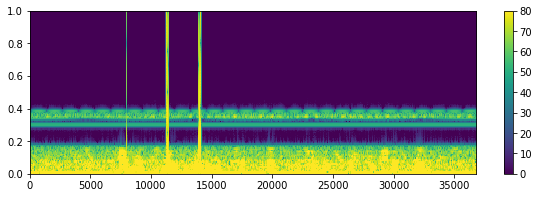

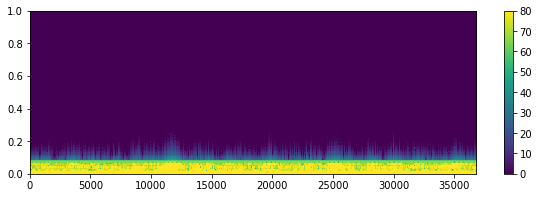

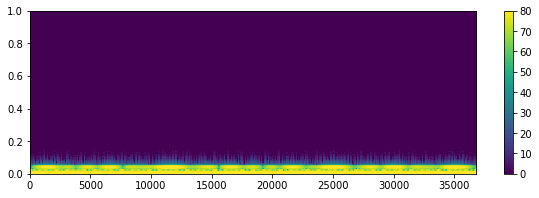

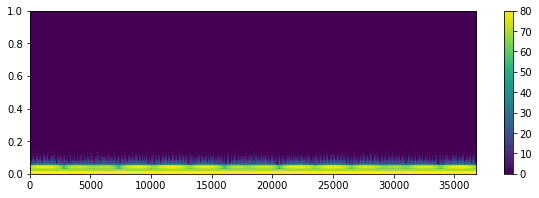

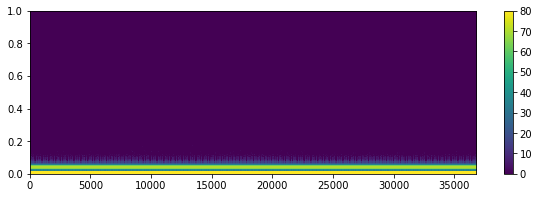

In [13]:
#loop over ordered dictionary to create audio and spectrogram
for key, value in ordered_voices.items():
    Audio(value[1])    
    specgram_cbar(value[0], clim=(0, 80))